# ADDING IN THE EXOGENOUS VARIABLE
# FOR THIS DATASET IT IS HOLIDAY LABEL

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [3]:
#Loading Datasets
df = pd.read_csv('/Users/rahulkumania/Desktop/UDEMY_TSA_FINAL/Data/RestaurantVisitors.csv',
                index_col="date",
                parse_dates= True)
df.index.freq = "D"

In [4]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [7]:
df1 = df.dropna()

#### Changing 'rest1', 'rest2', 'rest3', 'rest4', 'total' columsn dtype to int

In [10]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [11]:
cols = ['rest1', 'rest2', 'rest3','rest4', 'total']

In [13]:
for column in cols:
    df1[column] = df1[column].astype(int)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekday       478 non-null    object
 1   holiday       478 non-null    int64 
 2   holiday_name  478 non-null    object
 3   rest1         478 non-null    int64 
 4   rest2         478 non-null    int64 
 5   rest3         478 non-null    int64 
 6   rest4         478 non-null    int64 
 7   total         478 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 33.6+ KB


### Visualiziing Data

<AxesSubplot:xlabel='date'>

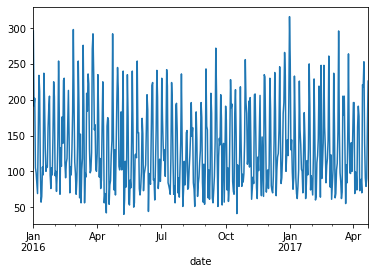

In [16]:
df1['total'].plot()

### ETS Decomposition

In [18]:
result_1 = seasonal_decompose(df1['total'])

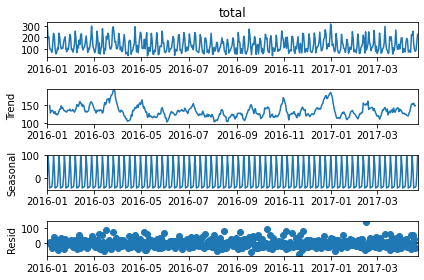

In [19]:
result_1.plot();

<AxesSubplot:xlabel='date'>

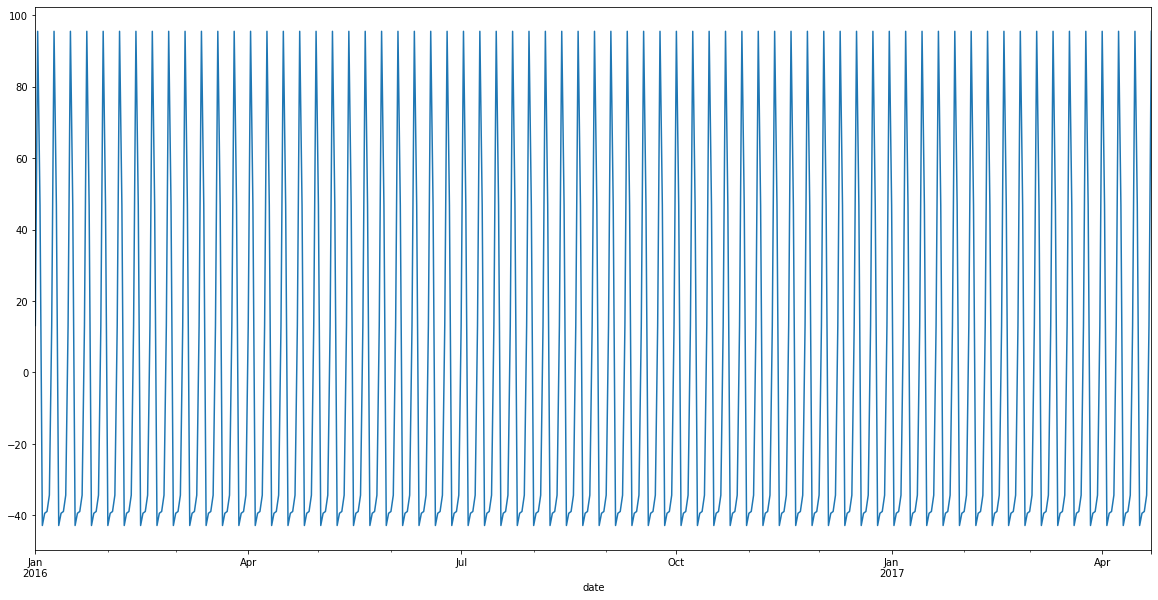

In [23]:
result_1.seasonal.plot(figsize=(20,10))

<AxesSubplot:xlabel='date'>

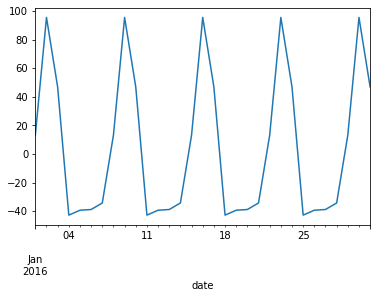

In [87]:
result_1.seasonal.loc[:'2016-01-31'].plot()

<AxesSubplot:xlabel='date'>

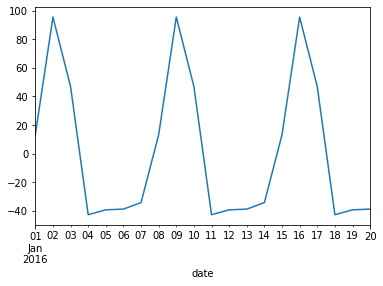

In [30]:
#ZOOMING IN 
result_1.seasonal.plot(xlim=['2016-01-01','2016-01-20'])

## Grid Search for SARIMAX order

In [31]:
auto_arima(df1['total'], exogenous = df1[['holiday']], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2382.887
Date:                   Mon, 27 Feb 2023   AIC                           4773.774
Time:                           21:37:18   BIC                           4790.452
Sample:                       01-01-2016   HQIC                          4780.331
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.2127      1.611      2.615      0.009       1.055       7.371
ar.S.L7        0.9655      0.013     76.342      0.000       0.941       0.990
ma.S.L7       -0.7618      0.050    -15.272      0.000      -0.860      -0.664
sigma2      1256.1556     76.785     16.359      0.000    1105.659    1406.652
===================================================================================
Ljung-Box (L1) (Q):                  15.79   Jarque-Bera (JB):                67.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.76
Prob(H) (two-sided):                  0.32   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# TRAIN our SARIMAX model

In [32]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [33]:
model = SARIMAX(train['total'], exog=train[['holiday']], order=(0,0,0), 
               seasonal_order=(1,0,1,7))

In [34]:
result = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24304D+00    |proj g|=  7.49269D-02

At iterate    5    f=  5.09816D+00    |proj g|=  9.66466D-03

At iterate   10    f=  4.81985D+00    |proj g|=  1.11327D-02

At iterate   15    f=  4.81298D+00    |proj g|=  2.51604D-04

At iterate   20    f=  4.81287D+00    |proj g|=  7.05894D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     25      1     0     0   9.504D-06   4.813D+00
  F =   4.8128709903323443     

CONVERG

 This problem is unconstrained.


In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2098.412
Date:                   Mon, 27 Feb 2023   AIC                           4204.824
Time:                           21:40:08   BIC                           4221.134
Sample:                       01-01-2016   HQIC                          4211.260
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       69.6580      3.969     17.550      0.000      61.879      77.437
ar.S.L7        0.9999   7.58e-05   1.32e+04      0.000       1.000       1.000
ma.S.L7       -0.9429      0.023    -40.376      0.000      -0.989      -0.897
sigma2       813.7137     47.400     17.167      0.000     720.812     906.615
===================================================================================
Ljung-Box (L1) (Q):                  15.57   Jarque-Bera (JB):                20.72
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.23
Prob(H) (two-sided):                  1.00   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
prediction = result.predict(start = len(train), end = len(train)+len(test)-1,
                           exog=test[['holiday']]).rename("SARIMAX PREDICTIONS")

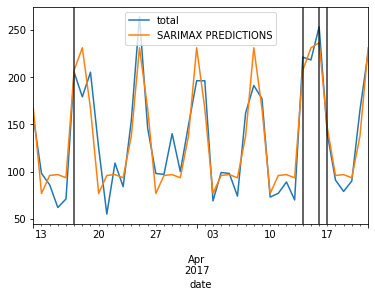

In [45]:
ax = test['total'].plot(legend=True)
prediction.plot(legend=True)

for day in test[test['holiday']==1].index:
    ax.axvline(x=day, color="black", alpha=0.8)



In [47]:
from statsmodels.tools.eval_measures import rmse

In [48]:
rmse(test['total'], prediction)

23.21451114620064

# FORECAST IN FUTURE

In [50]:
model_2 = SARIMAX(df1['total'], exog=df1[['holiday']],
                 order = (0,0,0), 
                 seasonal_order=(1,0,1,7))

In [51]:
result_2 = model_2.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.25201D+00    |proj g|=  5.81113D-02

At iterate    5    f=  5.10776D+00    |proj g|=  1.10555D-02

At iterate   10    f=  4.80848D+00    |proj g|=  2.23157D-02

At iterate   15    f=  4.79297D+00    |proj g|=  1.56028D-04

At iterate   20    f=  4.79270D+00    |proj g|=  4.77753D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     29      1     0     0   7.718D-06   4.793D+00
  F =   4.7926237222421424     

CONVERG

 This problem is unconstrained.


In [65]:
exog_forecast = df[478:][['holiday']]

In [69]:
forecast = result_2.predict(start = len(df1), end = len(df1)+38, 
                           exog = exog_forecast).rename("SARIMAX Forecast")

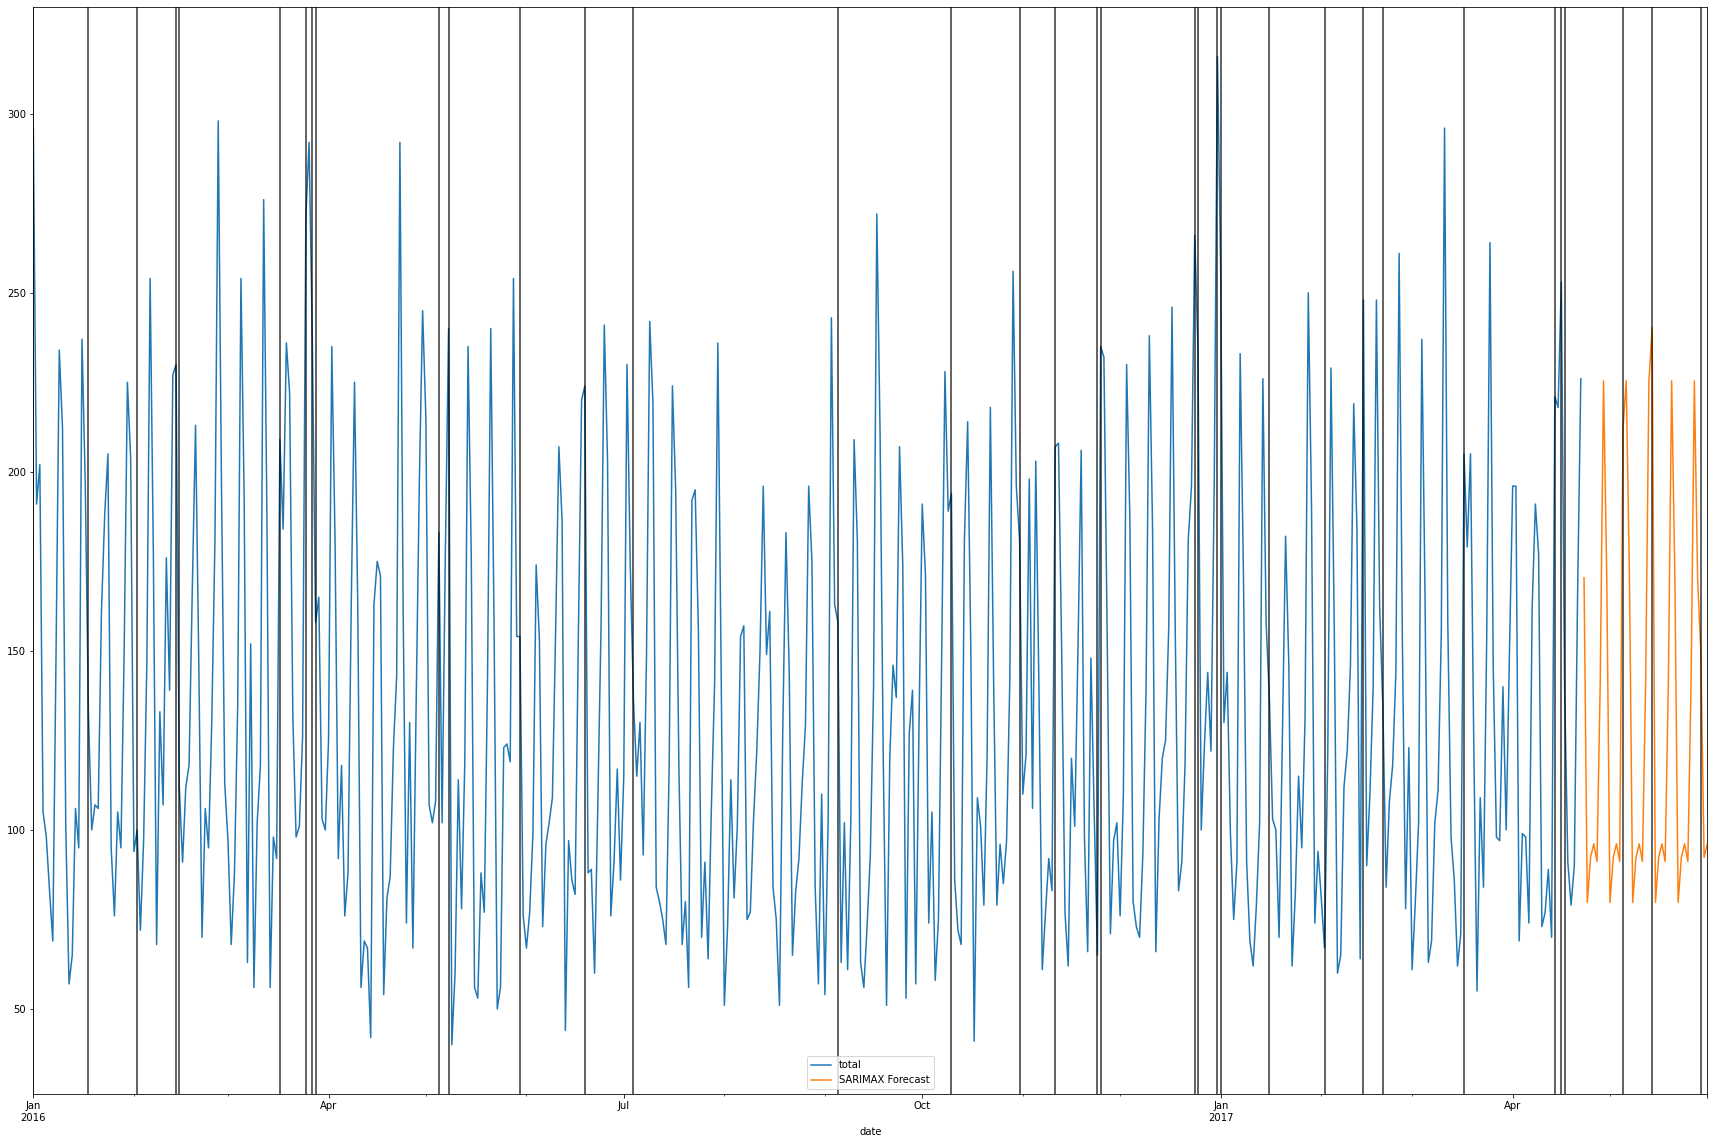

In [77]:
ax = df1['total'].plot(figsize=(30,20), legend=True)
forecast.plot(legend=True)

for day in df[df['holiday']==1].index:
    ax.axvline(x=day, color="black", alpha=0.8)

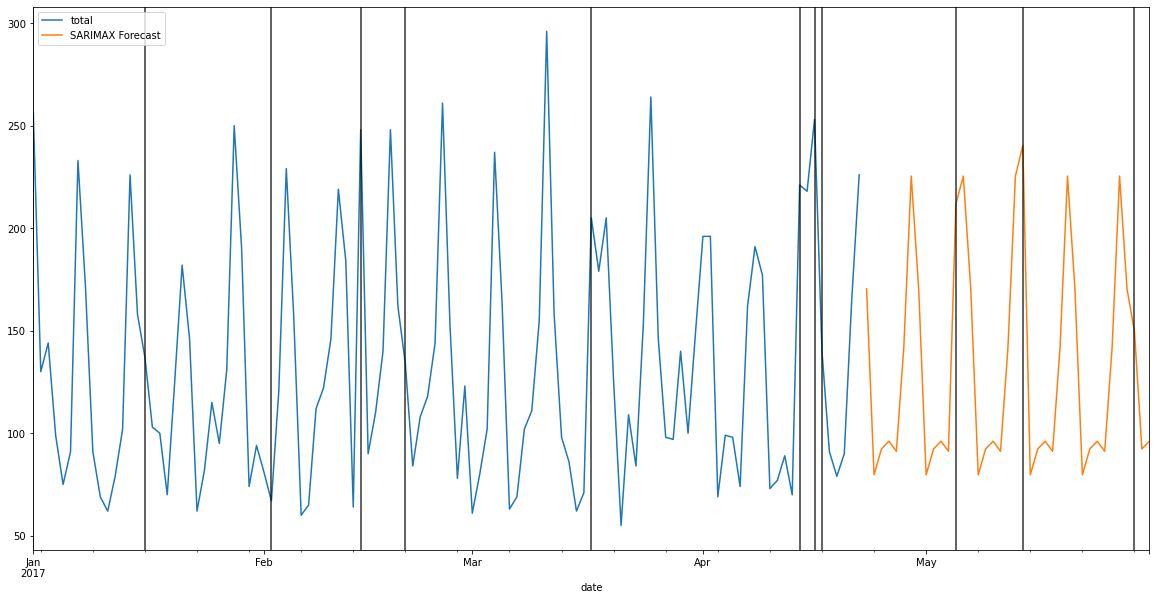

In [80]:
#ZOOMED In Result 

ax = df1['total'].loc['2017-01-01':].plot(figsize=(20,10), legend=True)
forecast.plot(legend=True)

for day in df[df['holiday']==1].index:
    ax.axvline(x=day, color="black", alpha=0.8)